Mona Mokart

## Practical Session - Unsupervised Learning

This Practical session is about unsupervised learning. We will use the dimensionality reduction and clustering techniques presented this morning to analyze toy examples.

Please answer the questions and complete the code where you see (`XXXXXXXXXX`). 

In this jupyter notebook, you can play with the toy examples shown during the lecture. 

First let's load the functions we will use

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
plt.close('all')

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans

from scipy import linalg as LA
from scipy.stats import ortho_group

The next three functions are used to create the data and plot the results.

In [2]:
def generate_scenario(scenario=3, n_samples0 = 100, n_samples1 = 30):

    y = np.concatenate((np.zeros([n_samples0,1]) , np.ones([n_samples1,1])) , axis=0)

    if scenario == 1: 
        # Separate Gaussian
        mean0 = [2, 3]
        mean1 = [12, 14]
        cov0 = [[1, 1.5], [1.5 ,3]]
        cov1 = 2 ** 2 * np.eye(2)
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
    elif scenario == 2:
        # Overlapping Gaussian
        mean0 = [2, 3]
        mean1 = [5, 7]
        cov0 = [[1, 1.5], [1.5 ,3]]
        cov1 = [[2, 3], [3 ,6]]
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
        
    elif scenario == 3:
        # Overlapping Gaussian
        mean0 = [0, 0]
        mean1 = [0, 0]
        cov0 = [[50, 4], [4, 2]]
        cov1 = [[2, 0], [0 ,50]]
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
        
    elif scenario == 4:
        # Circles
        # 1 circle
        angle0=np.linspace(0, 2 * np.pi, n_samples0);
        X0=np.vstack((8*np.cos(angle0) , 8*np.sin(angle0))).T
        
        # 2 circle
        angle1=np.linspace(0, 2 * np.pi, n_samples1);
        X1=np.vstack((2*np.cos(angle1) , 2*np.sin(angle1))).T

    return X0,X1,y

def plotResults(X=None,U=None,Y=None,const=1,title=''):
    
    N0=np.sum(y==0)
    N1=np.sum(y==1)
    
    fig=plt.figure(figsize=(17, 6))
    
    ax  = fig.add_subplot(1, 3, 1)
    plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
    plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
    if U is not None:
        average=X.mean(axis=0)
        sd=LA.norm(X.std(axis=0))
        u0=U[:,0]*const*sd;
        u1=U[:,1]*const*sd;
        plt.plot([average[0]-u0[0], average[0]+u0[0]],[average[1]-u0[1], average[1]+u0[1]], c='g',linewidth=4, label='C 1' )
        plt.plot([average[0]-u1[0], average[0]+u1[0]],[average[1]-u1[1], average[1]+u1[1]], c='k',linewidth=4, label='C 2' )
        plt.title('Original data and components')
    else:
        plt.title('Original data')
    plt.legend()
    
    ax  = fig.add_subplot(1, 3, 2)
    plt.scatter(Y[np.where(y == 0)[0],0], np.zeros((N0,1)), c='r', s=3, marker='o', label='Class 0',alpha=0.2)
    plt.scatter(Y[np.where(y == 1)[0],0], np.zeros((N1,1)), c='b', s=3, marker='x', label='Class 1',alpha=0.2)
    
    
    ax.set_title(title + '\n Scores on 1st component')
    
    ax  = fig.add_subplot(1, 3, 3)
    
    plt.scatter(Y[np.where(y == 0)[0],1], np.zeros((N0,1)), c='r', s=3, marker='o', label='Class 0',alpha=0.2)
    plt.scatter(Y[np.where(y == 1)[0],1], np.zeros((N1,1)), c='b', s=3, marker='x', label='Class 1',alpha=0.2)
    
    plt.legend()
    plt.title('Scores on 2nd component')
    
    plt.show()
    
    
def frontiere(model, X, y, step=50):

    labels = np.unique(y)
 
    min_tot = np.min(X)
    max_tot = np.max(X)
    delta = (max_tot - min_tot) / step
    xx, yy = np.meshgrid(np.arange(min_tot, max_tot, delta),
                         np.arange(min_tot, max_tot, delta))
    z = np.array( model.predict(np.c_[xx.ravel(), yy.ravel() ]) )
    z = z.reshape(xx.shape)
   
    plt.imshow(z, origin='lower', extent=[min_tot, max_tot, min_tot, max_tot],
               interpolation="mitchell", cmap='RdBu')
    
    cbar = plt.colorbar(ticks=labels)
    cbar.ax.set_yticklabels(labels)
    
    plt.scatter(X[np.where(yKmeans == 0)[0],0],X[np.where(yKmeans == 0)[0],1],c='r', label='Predicted class 0')
    plt.scatter(X[np.where(yKmeans == 1)[0],0],X[np.where(yKmeans == 1)[0],1],c='b', label='Predicted class 1')
    
     
    
    plt.ylim([min_tot, max_tot])
    plt.xlim([min_tot, max_tot])
    

Now,let's create the data we will use.
Try the 4 different scenarios by simply varying the `scenarioIndex` value between 1 and 4.

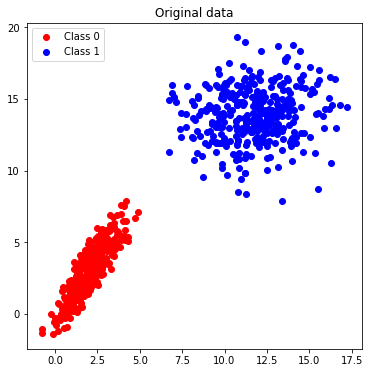

In [3]:
## Choose the scenarioIndex (value between 1 and 4)
scenarioIndex = 1
##

X0,X1,y = generate_scenario(scenario=scenarioIndex, n_samples0 = 350, n_samples1 = 350)

plt.figure(figsize=(6, 6))
plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()
plt.show()

It's time to use the methods seen this morning. 

As you can see, we have generated two populations (class 0 and class 1). We concatenate them as a single matrix *X* which will be the input for all methods. In this way, the methods will be unaware of the class of the observations (unsupervised) and we will test whether the methods are appropriate for the analysed scenario and if they are able to use less dimensions to correctly distinguish the two classes. 

Let's start with PCA. 

**Question:**
1. Use PCA with the different 4 scenarios and comment the results. When does PCA work well ?

The variance explained by the two first modes is respectively:  [0.96309697 0.03690303]


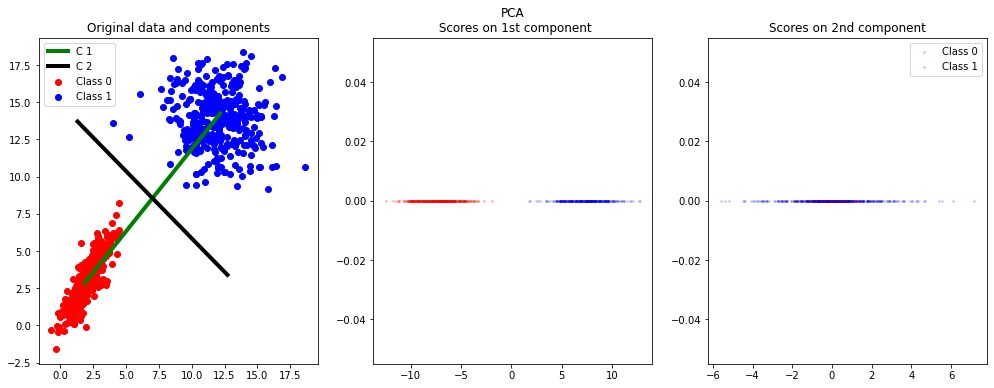

The variance explained by the two first modes is respectively:  [0.97029905 0.02970095]


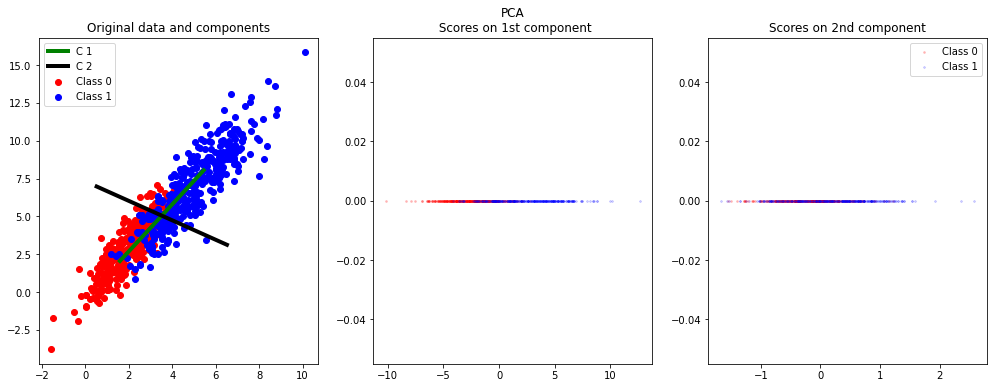

The variance explained by the two first modes is respectively:  [0.52259549 0.47740451]


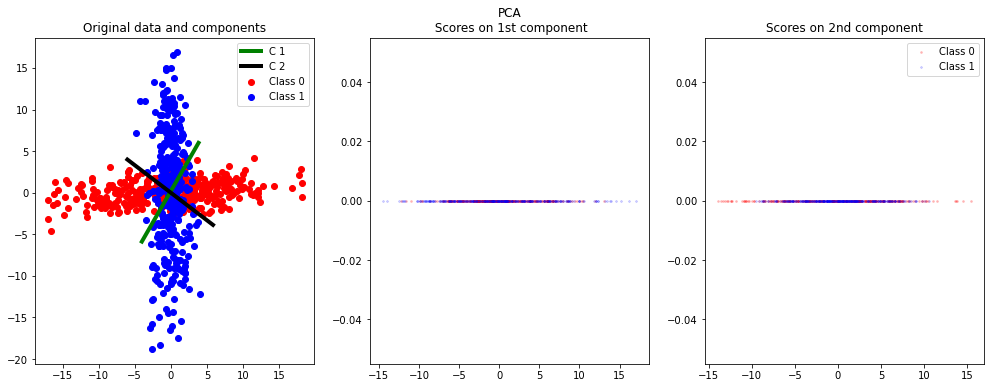

The variance explained by the two first modes is respectively:  [0.50142558 0.49857442]


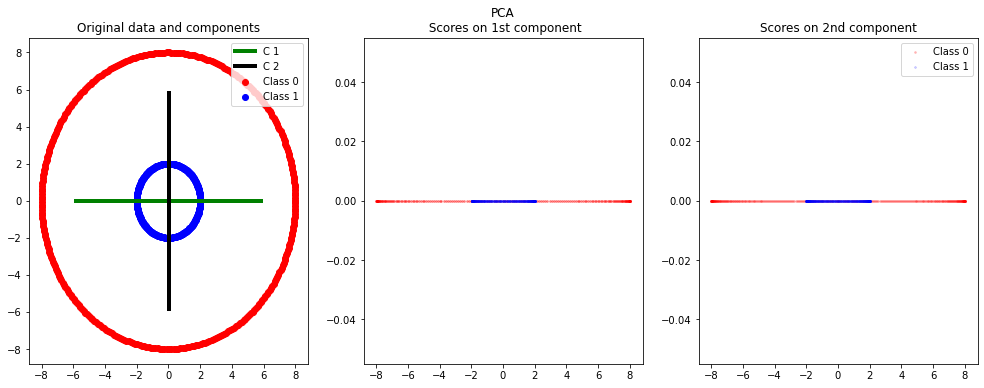

In [4]:
for i in range(1,5):
    X0,X1,y = generate_scenario(scenario=i, n_samples0 = 350, n_samples1 = 350)
    X=np.concatenate((X0,X1),axis=0)

    ## PCA
    pca = PCA(random_state=1) # by fixing the random_state we are sure that results are always the same
    Ypca=pca.fit_transform(X)
    U=pca.components_.T # we want PC on columns
    D = (pca.singular_values_)**2/(X.shape[0]-1) # computation of the eigenvalues

    print('The variance explained by the two first modes is respectively: ', pca.explained_variance_ratio_)
    plotResults(X,U,Ypca,const=1,title='PCA')

PCA est utile uniquement pour le premier scénario. En effet on voit que seulement avec le premier scénario, la projection sur PC1 separe les deux classes. Ce n'est pas les cas pour les 3 autres scénarios. Pour le deuxième scénario les clusters ne semblent pas être séparables. Pour le troisième scénario, le choix des axes selon la plus grande variance n'est peut-être la meilleure chose ici, les clusters se supperposent et donc il serait plus intelligent d'utiliser l'algorithme d'ICA. Pour le 4e scénario il faudrait utiliser KPCA car il ne s'agit pas de transformation linéaire.

**Question:**
1. Instead than using the scikit-learn implementation, implement one on your own ! Complete the code where you see **XXXXXXXXXXXXXX**

In [5]:
def pcaLecture(X):
    ''' 
    Inputs: 
            X: is a [Nxd] matrix. Every row is an observation and every
              column consists of features.
    Outputs:
            Y: is a [Nxd] matrix representing the scores, namely the 
            coordinates of X onto the new basis given by the eigenvactors U
            of the covariance matrix of X. Columns are the principal components.
               
            U: columns are Eigenvectors (sorted from the greatest to the lowest eigenvalue)
    
            D: Eigenvalues (sorted from the greatest to the lowest eigenvalue)
               
            var_explained: percentage of the original variability explained
            by each principal component.
    '''
    
    N=X.shape[0]

    Xc=X - np.mean(X,axis=0)  #centering

    D2, Uh = LA.svd(Xc)[1:3] # computation of eigenvectors and eigenvalues using SVD
    U=Uh.T
    Y=Xc@U[:,0:2] # computation of the scores
    D=D2**2/(N-1) # computation of the eigenvalues
    tot=np.sum(D)
    var_explained = np.array(D[:2]/tot) # computation of explained variance
    return Y,U,D,var_explained

**Question:**
1. Test your own implementation and check whether the results are the same of the scikit-learn implementation

The variance explained by the two first modes is respectively:  [0.96574475 0.03425525]


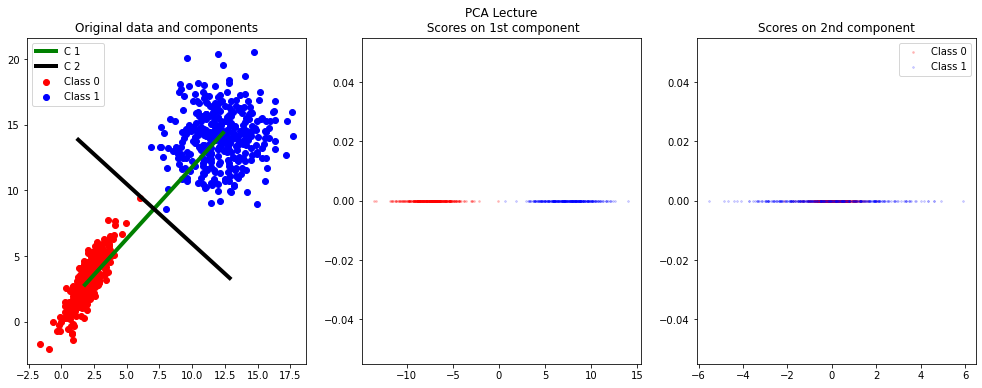

In [6]:
X0,X1,y = generate_scenario(scenario=1, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)
YpcaLec,UpcaLec,DpcaLec,var_explainedPcaLec=pcaLecture(X)
print('The variance explained by the two first modes is respectively: ',var_explainedPcaLec)
plotResults(X,UpcaLec,YpcaLec,const=1,title='PCA Lecture')

Let's use Kernel-PCA with the rbf kernel (you can also test other kernels if you want).

**Question:**
1. Use Kernel-PCA with the different 4 scenarios and comment the results. When does K-PCA work well ? Why ?

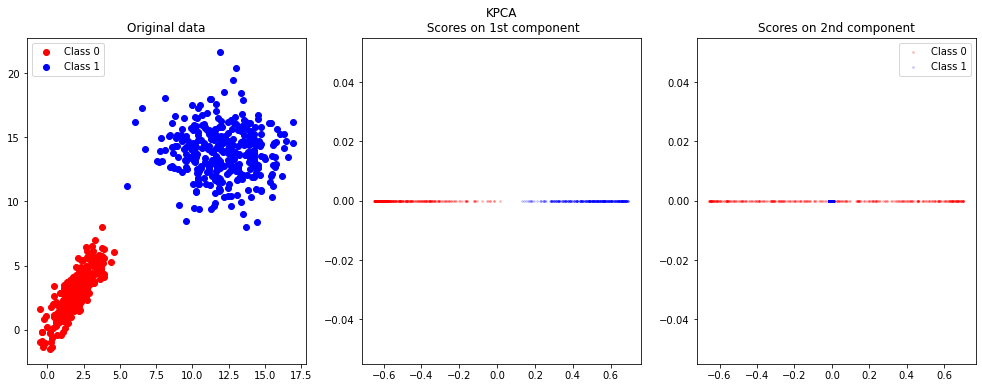

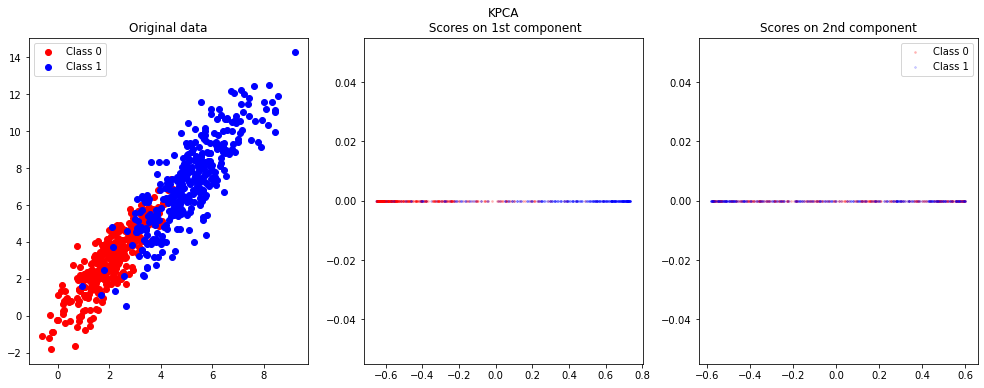

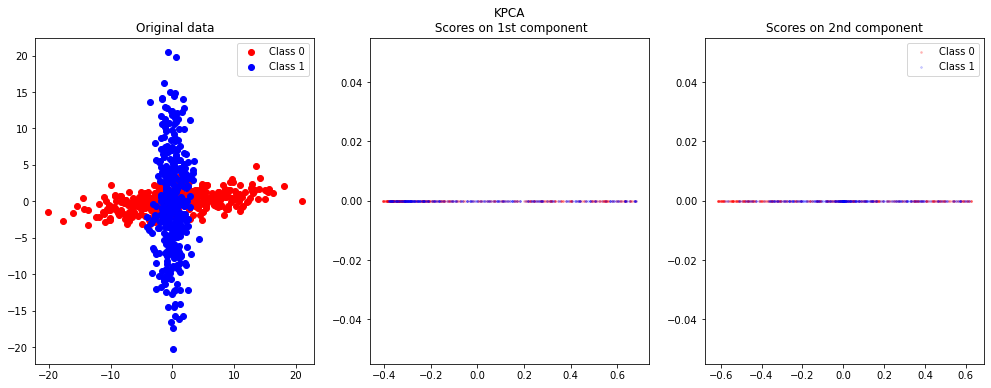

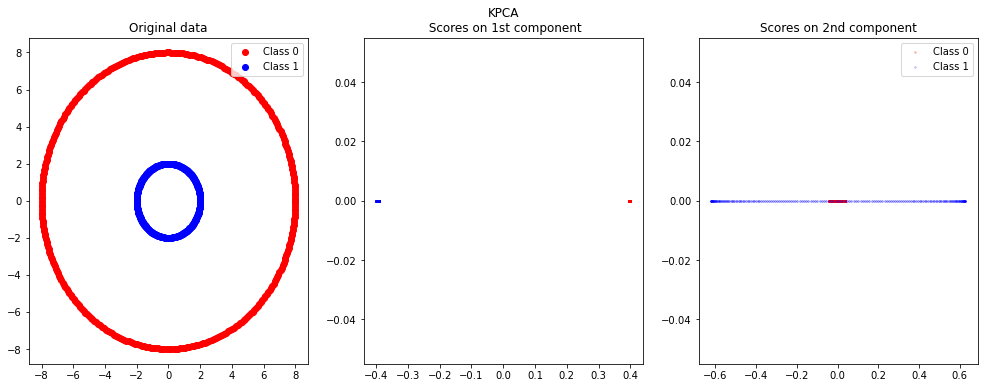

In [7]:
# Kernel-PCA
for i in range(1,5):
    
    X0,X1,y = generate_scenario(scenario=i, n_samples0 = 350, n_samples1 = 350)
    X=np.concatenate((X0,X1),axis=0)
    gamma=0.1
    Kpca = KernelPCA(kernel='rbf', gamma=gamma, random_state=1)
    YKpca=Kpca.fit_transform(X)
    DKpca=Kpca.lambdas_
    AKpca=Kpca.alphas_

    plotResults(X=X,Y=YKpca,const=1,title='KPCA')

KPCA fonctionne correctement pour le premier scénario et surtout pour le scénario 4 car on a utilisé un noyau gaussien qui permet de régler le problème de linéarité des données avec PCA

## **Question:**
1. Instead than using the scikit-learn implementation, implement one on your own ! Complete the code where you see **XXXXXXXXXXXXXX**

In [8]:
def KpcaGaussianLecture(X,gamma):
    '''  
    Inputs: 
            X: is a [Nxd] matrix. Every row is an observation and every
            column is a feature.
 
    Outputs:
            Y: is a [Nxd] matrix representing the scores, namely the 
            coordinates of \phi(X) onto the new basis given by the eigenvactors 
            of the covariance matrix of \phi(X). Columns are the principal components.

            An: columns are Eigenvectors normalised (sorted from the greatest
            to the lowest eigenvalue)
     
            D: Eigenvalues (sorted from the greatest to the lowest eigenvalue)

            var_explained: percentage of the original variability explained
            by each principal component.

    '''

    # kernel matrix using a rbf kernel
    def kernel_matrix(X,gamma):
      N=X.shape[0]
      InnerX = np.dot(X,X.T)
      temp1=np.sum(X**2,axis=1).reshape((N,1))
      temp2=np.sum(X**2,axis=1).reshape((1,N))
      Norm1 = np.repeat(temp1,N,axis=1)
      Norm2 = np.repeat(temp2,N,axis=0) 
      Norm = Norm1+Norm2-2*InnerX;
      Norm[Norm<1e-10]=0;    
      K=np.exp(-Norm/(2*gamma**2))
      return K
       
    N=X.shape[0]

    K=kernel_matrix(X,gamma)
    
    # center kernel matrix
    oneN=np.ones((N,N))/N;
    Kc= K -oneN@K -K@oneN +oneN@K@oneN

    # eigenvalue analysis
    D,A=LA.eigh(Kc)     
    idx = D.argsort()[::-1]  # reverse order to make 'descend' 
    D = np.real(D[idx])
    D[D<0]=1e-18 # make negative eigenvalues positive (and almost 0)
    A = np.real(A[:,idx])

    # variance explained
    tot=np.sum(D)
    var_explained = D/tot # computation of explained variance

    # Normalisation eigenvectors
    # Norm of every eigenvector is 1, we want it to be 1/sqrt(N*eig)
    
    An=np.copy(A)
    for i in range(N):      
        An[:,i]=np.dot(A[:,i],(1/np.sqrt((N-1)*D[i])) )

        
    Y=Kc@(An[:,0:2])
    
    return Y,An,D,var_explained

Test your own implementation

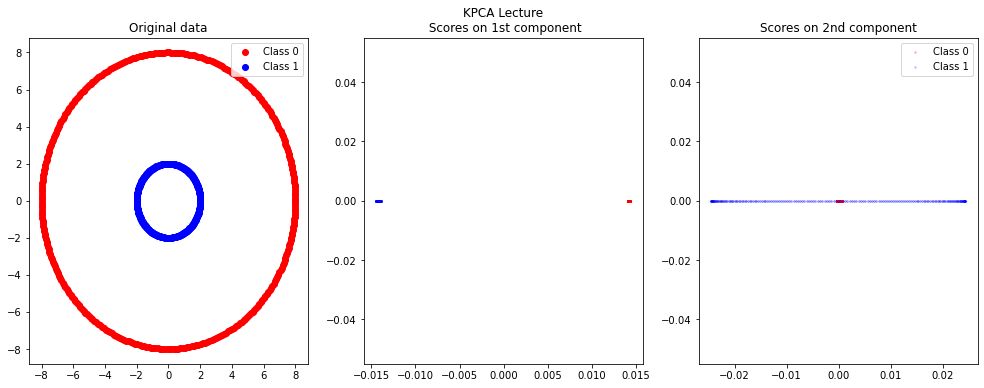

In [9]:
YKpcaLec, AnKpcaLec, DKpcaLec, var_explainedKpca = KpcaGaussianLecture(X,2)
plotResults(X=X,Y=YKpcaLec,const=1,title='KPCA Lecture')

Now, test ICA.

**Question:**
1. Use ICA with the different 4 scenarios and comment the results. When it works better than PCA ? Why ?

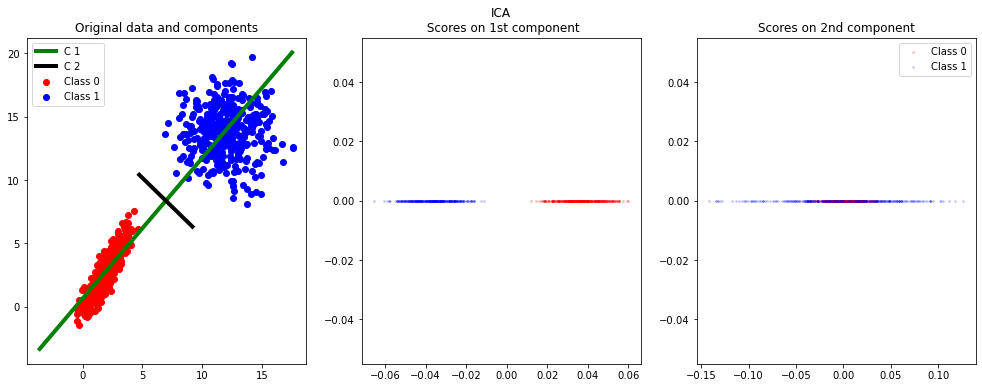

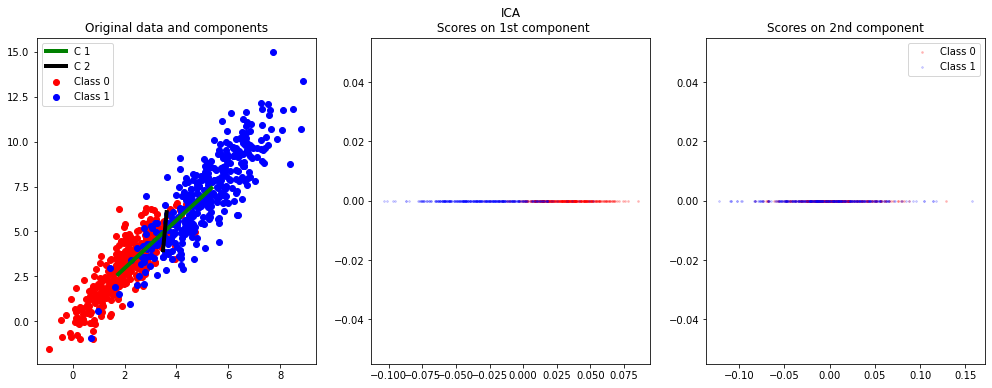

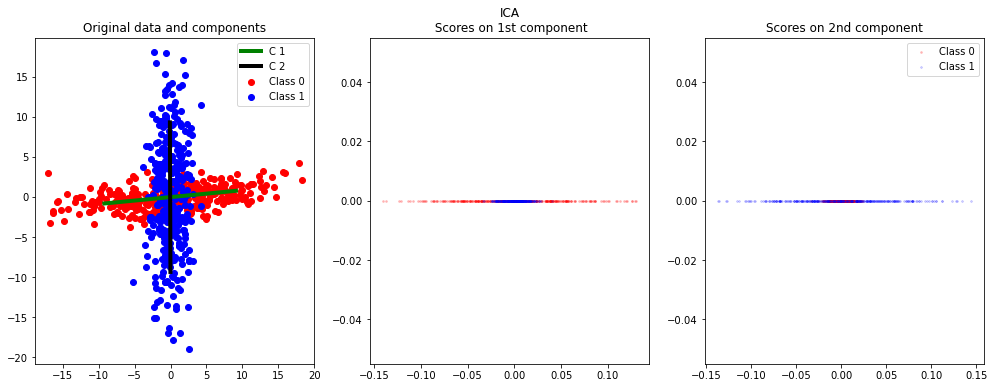

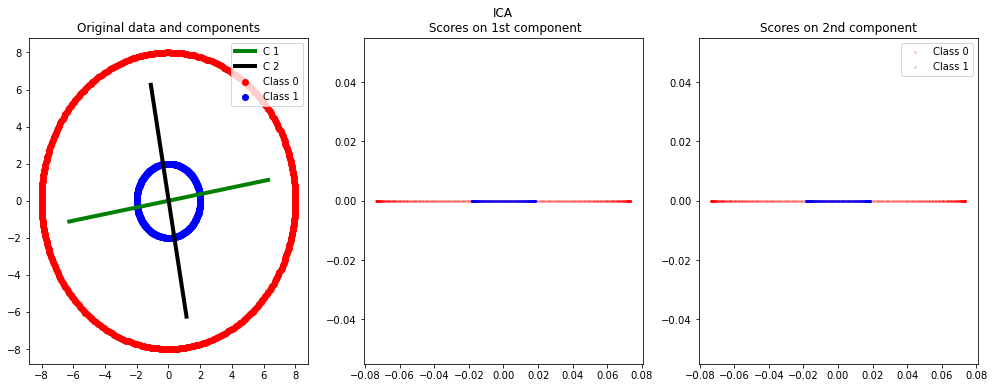

In [10]:
## ICA
for i in range(1,5):
    
    X0,X1,y = generate_scenario(scenario=i, n_samples0 = 350, n_samples1 = 350)
    X=np.concatenate((X0,X1),axis=0)
    ICA= FastICA(whiten=True, fun='exp', max_iter=20000, tol=0.00001, random_state=1)
    Yica=ICA.fit_transform(X)
    Wica=ICA.mixing_
    plotResults(X=X,U=Wica,Y=Yica,const=0.01,title='ICA')

Ici mis à part le premier scénario, il semblerait que ICA ne permette pas de séparer les classes. Cependant on remarque que pour le scénario 3, il est possible de retrouver les deux classes à partir des deux composantes sélectionnées. En effet chaque composante "correspond" à une classe.

**Question:**
1. Instead than using the scikit-learn implementation, implement one on your own !
Complete the code where you see **XXXXXXXXXXXXXX**

In [11]:
def FastICALecture(X,N_Iter=3000,tol=1e-5,plot_evolution=0):
    '''
    Inputs: 
                   X: is a [d x N] matrix. Every column is an observation 
                   and every row is a feature.       
    
                   (Optional) N_Iter: maximum number of iterations
    
                   (Optional) delta: convergence criteria threshold
    
                   (Optional) plot_evolution: plot evolution of error
                   
     Outputs:      
                   S: [d x N] matrix.  Each column is an independent component 
                   of the centred and whitened input data X              
                   
                   W: [d x d] matrix. It is the demixing matrix. S = W*Xcw 
    
    '''
    
    # We choose G=-exp(-1/2t^2)
    # First derivative of G   
    def g(t): #XX
        res = t*np.exp(-0.5*t**2)
        return res
    
    # Second derivative of G  
    def gp(t): #XX
        res = (1-t**2)*np.exp(-0.5*t**2)
        return res
    
    # Size of X
    d,N=X.shape 
        
    # Compute sample mean
    mu = np.mean(X,axis=1)
    mu = mu[:,np.newaxis]#XX
    
    # Center data
    Xc=X-mu #XX
        
    # Whiten data
    cov = np.cov(X)
    omega = LA.cholesky(LA.inv(cov))
    Xcw=omega@Xc #XX
    
    
    
     # check if are whitened
    #if np.sum(np.eye(d) - np.abs(np.cov(Xcw)))>1e-10:
        #raise NameError('Your whitening transformation does not work...')
    
    # Initialize W
    W = ortho_group.rvs(d) # random orthogonal matrix 
    
    # delta evolution
    k = 0
    delta = np.inf
    evolutionDelta=[]
    
    while delta > tol and k < N_Iter:
    
        k = k + 1
        W_old = np.copy(W)
        

        Wp = g(W@Xcw)@(Xcw.T)-np.diag(gp(W@Xcw)@np.ones(N))@W
        

        W_inv_sqrt = LA.cholesky(LA.inv(Wp@Wp.T))
        W = W_inv_sqrt@Wp
        
        if np.sum(np.eye(d)-np.abs(np.dot(W,W.T)))>1e-10:
            raise NameError('W should be an orthogonal matrix. Check the computations')
                 
        delta = 1-np.min(np.abs(np.diag(np.dot(W.T,W_old))))
        evolutionDelta.append(delta)
        
        if k==1 or k%100==0:
            print('Iteration ICA number ', k, ' out of ', N_Iter , ', delta = ', delta)
     
        
    if k==N_Iter:
        print('Maximum number of iterations reached ! delta = ', delta)
    else:
        print('Convergence achieved ( delta = ', delta, ') in ', k, ' iterations')


    # Independent components
    S = W@Xcw
            
    if plot_evolution==1:
        plt.figure(figsize=(6, 6))
        plt.plot(range(k),evolutionDelta,'bx--', linewidth=4, markersize=12)  
        plt.title('Evolution of error - ICA')
        plt.show()
       
    return S,W

Test your own implementation

Iteration ICA number  1  out of  3000 , delta =  0.1673777876910385
Convergence achieved ( delta =  0.0009477323049352782 ) in  15  iterations


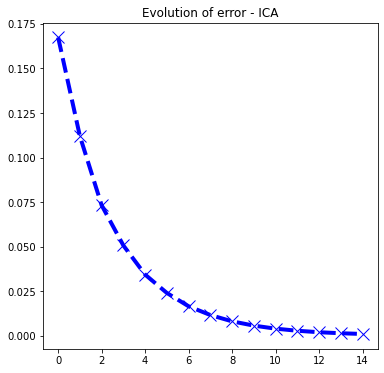

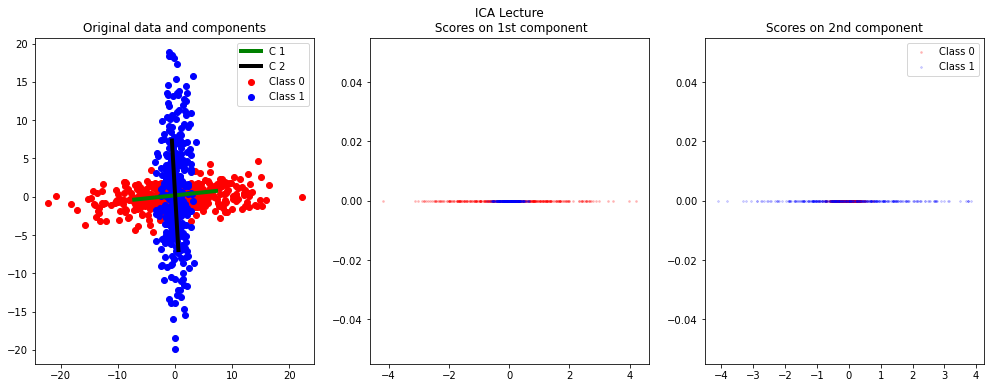

In [16]:
X0,X1,y = generate_scenario(scenario=3, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)
SicaLec,WicaLec = FastICALecture(X.T,N_Iter=3000,tol=1e-3,plot_evolution=1)
plotResults(X=X, U=WicaLec.T, Y=SicaLec.T, const=1, title='ICA Lecture')

With a different perspective, we could also use K-means. As before, we will use it on X and we will check whether it can well separate the two classes. 


**Question:**
1. Does it work well in all scenarios ? Why ? Is it always easy to define the correct number of clusters ?

In [13]:
X0,X1,y = generate_scenario(scenario=1, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)

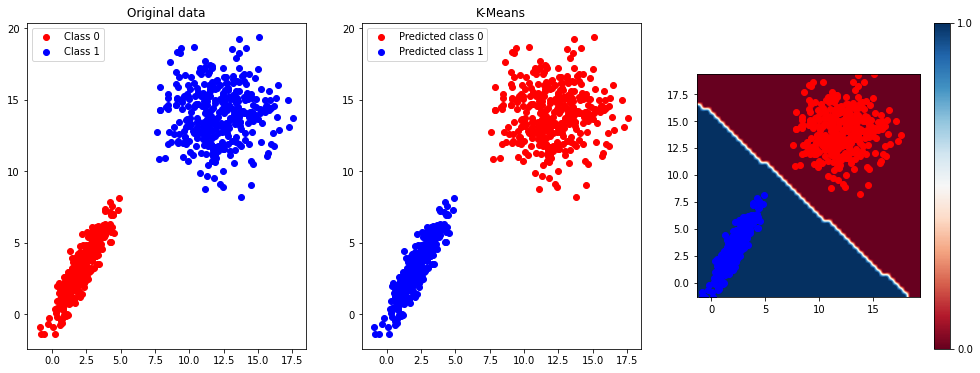

In [14]:
## K-means
Ncluster= 2 # choose a number of clusters
kmeans=KMeans(n_clusters=Ncluster) 
yKmeans=kmeans.fit_predict(X)

plt.figure(figsize=(17, 6))
plt.subplot(131)
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r', label='Class 0')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()

plt.subplot(132)
plt.scatter(X[np.where(yKmeans == 0)[0],0],X[np.where(yKmeans == 0)[0],1],c='r', label='Predicted class 0')
plt.scatter(X[np.where(yKmeans == 1)[0],0],X[np.where(yKmeans == 1)[0],1],c='b', label='Predicted class 1')
plt.title('K-Means')
plt.legend()

plt.subplot(133)
frontiere(kmeans, X, y, step=50)

plt.show()

K-means fonctionne bien pour le premier scénario car les clusters sont séparés spatialement. Ce n'est pas le cas du deuxième et troisième scénario donc cela ne fonctionnera pas. Pour ce qui est du 4e scénario cela ne fonctionne pas car K-means utilise la distance au centroid pour attribuer les classes. Or la géométrie circulaire pose un problème dans ce cas là.